In [1]:
#conda install conda-forge::ffmpeg

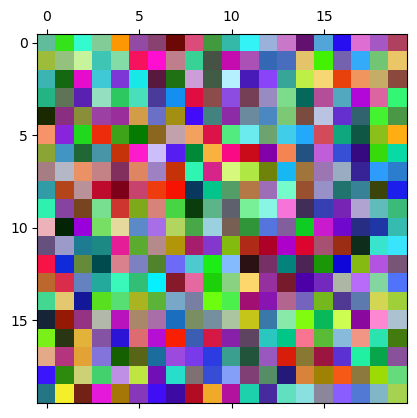

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Ustawiamy parametry
matrix_size = 20

# Tworzymy macierz zawierającą koordynaty macierzy opisywanej
coord_matrix = np.zeros((matrix_size * matrix_size, 2))
# Tworzymy macierz do przechowywania wektora
vector_matrix = np.zeros((matrix_size * matrix_size, 3))

# Wypełniamy macierz koordynatów
for i in range(1, matrix_size + 1):
    for j in range(1, matrix_size + 1):
        coord_matrix[(i - 1) * matrix_size + (j - 1)] = (i, j)

# Wypełniamy macierz wektora
for i in range(matrix_size * matrix_size):
    for j in range(3):
        vector_matrix[i, j] = random.uniform(0, 1)

# Łączymy je
result = np.concatenate((coord_matrix, vector_matrix), axis=1)

# Pętla modyfikująca naszą macierz
def axelrod(matrix, num_iterations, save_path=None):
    # Funkcja aktualizująca wizualizację
    def update(frame):
        # Losowo wybieramy agenta
        coord_x = random.randint(1, matrix_size)
        coord_y = random.randint(1, matrix_size)

        neighbor_coord_x = coord_x
        neighbor_coord_y = coord_y
        
        # Losowo wybieramy liczby potrzebne do wybrania sąsiada
        select_helper = random.randrange(-1, 2, 2)
        add_helper = random.randrange(-1, 2, 2)

        # Wybieramy sąsiada tak, by jego współrzędne nie wyszły poza wielkość macierzy
        if select_helper == -1:
            new_neighbor_coord_x = max(1, neighbor_coord_x + add_helper)
            neighbor_coord_x = min(new_neighbor_coord_x, matrix_size)
        else:
            new_neighbor_coord_y = max(1, neighbor_coord_y + add_helper)
            neighbor_coord_y = min(new_neighbor_coord_y, matrix_size)
        
        # Wybieramy indeks wektora, który chcemy podmienić i wartość miejsca o tym indeksie
        selected_vector_index = random.randint(1, 3 - 1)
        selected_point_value = matrix[
            (coord_x - 1) * matrix_size + coord_y - 1, selected_vector_index + 1]
        
        # Resetujemy prawdopodobieństwo z poprzedniej iteracji pętli
        probability = 0
        
        # Liczymy nowe prawdopodobieństwo
        for i in range(3):
            if matrix[(coord_x - 1) * matrix_size + coord_y - 1, i + 2] == \
                    matrix[(neighbor_coord_x - 1) * matrix_size + neighbor_coord_y - 1, i + 2]:
                probability += 1
        
        # Losujemy liczbę od 1 do 3 
        random_number = random.randint(1, 3)
        
        # Jeśli jest ona mniejsza od prawdopodobieństwa, to dochodzi do dziedziczenia cechy
        if random_number >= probability:
            matrix[(neighbor_coord_x - 1) * matrix_size + neighbor_coord_y - 1,
            selected_vector_index + 1] = selected_point_value
        
        # Każdej z 3 liczb w wektorze przypisujemy kolor r, g lub b. Działa on tylko na pojedynczym pikselu 
        r, g, b = matrix[(neighbor_coord_x - 1) * matrix_size + neighbor_coord_y - 1, 2:5]
        r, g, b = r * 255, g * 255, b * 255  # Skalowanie do zakresu 0-255
        visualization_matrix[neighbor_coord_x - 1, neighbor_coord_y - 1] = (r, g, b)

        cax.set_array(visualization_matrix)
        return cax,

    visualization_matrix = np.zeros((matrix_size, matrix_size, 3), dtype=int)
    
    # Przypisywanie kolorów na całej macierzy
    # Wykonuje się tylko raz na początku, by stworzyć kolor dla każdego piksela w pierwszej klatce animacji 
    for i in range(matrix_size * matrix_size):
        row_idx = int(matrix[i, 0]) - 1
        col_idx = int(matrix[i, 1]) - 1
        r, g, b = matrix[i, 2:5]
        r, g, b = r * 255, g * 255, b * 255  # Skalowanie do zakresu 0-255
        visualization_matrix[row_idx, col_idx, :] = (r, g, b)

    fig, ax = plt.subplots()
    cax = ax.matshow(visualization_matrix, cmap='viridis')  # Użyj mapy kolorów viridis

    ani = FuncAnimation(fig, update, frames=range(0, num_iterations, 10), repeat=False, blit=True) 
    # Aktualizuje tablicę wizualizacyjną 

    if save_path:
        ani.save(save_path, writer='ffmpeg', fps=10, dpi=200)

    plt.show()

# Wywołanie funkcji
num_iterations = 1000
video_save_path = r'C:\Users\kubaj\Desktop\CV-NEW\Axelrod Model\heatmap-nowa.mp4'  # Wprowadź pełną ścieżkę do dowolnego folderu
axelrod(result, num_iterations, save_path=video_save_path)